# Data Analytics Pathway Assessment

## by Richmond Tetteh

### Introduction

This document explores a direct marketing campaigns (phone calls) dataset of a banking institution to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving data_4.zip to data_4.zip


In [4]:
import zipfile
import io

# Get the uploaded ZIP file name
data_4 = list(uploaded.keys())[0]

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[data_4]), 'r') as zip_ref:
    zip_ref.extractall("extracted")  # Extract to a folder named 'extracted'

In [5]:
import os

# List the extracted files to find the CSV name
print(os.listdir("extracted/data"))



['bank-additional-full.csv', 'bank.csv', 'bank-full.csv', 'bank-names.txt', 'bank-additional.csv']


In [2]:
# Read the CSV file from the extracted folder
bank_additional_full = pd.read_csv("extracted/data/bank-additional-full.csv", delimiter=';')

# Preview the dataset
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Assessing Data

In [3]:
# high-level overview of data shape and composition
print(bank_additional_full.shape)
print(bank_additional_full.dtypes)
print(bank_additional_full.head(10))

(41188, 21)
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school    

In [4]:
print("\nTarget distribution (y):\n", bank_additional_full["y"].value_counts(normalize=True))


Target distribution (y):
 y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [5]:
bank_additional_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_additional_full.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
bank_additional_full.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10420,47,unknown,married,unknown,unknown,no,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
37310,37,blue-collar,married,basic.9y,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,yes
22862,56,technician,married,university.degree,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1736,43,entrepreneur,married,high.school,unknown,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
13278,55,retired,married,basic.9y,unknown,unknown,unknown,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [8]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
bank_additional_full.marital.value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [11]:
bank_additional_full.education.value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [12]:
bank_additional_full.job.value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [13]:
bank_additional_full.day_of_week.value_counts()

,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827


In [14]:
bank_additional_full.default.value_counts()

,count
default,
no,32588
unknown,8597
yes,3


 Check Missing Values

In [15]:
# Check for missing values (coded as 'unknown' in categorical columns)
missing_values = bank_additional_full.replace('unknown', np.nan).isna().sum()
print("Missing Values (after replacing 'unknown'):")
print(missing_values[missing_values > 0])

Missing Values (after replacing 'unknown'):
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


Observations:
default (3,859), housing (990), loan (990), job (330), education (1,731) have missing values.

Action:

Drop default (too many missing values).

Replace remaining "unknown" with mode (most frequent category).

Data Types & Unique Values

In [16]:
print("\nData Types:")
print(bank_additional_full.dtypes)

# Check unique values in categorical columns
categorical_cols = bank_additional_full.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(bank_additional_full[col].unique())


Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Unique values in job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in marital:
['married' 'single' 'divorced' 'unknown']

Unique values in education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in default:
['no' 'unknown

Observations:
Categorical columns should be encoded.

pdays (days since last contact) has 999 for "not previously contacted". This should be treated separately.

Data Cleaning

In [17]:
# Make copies of original pieces of data
bank_additional_full_clean = bank_additional_full.copy()

Test

In [18]:
bank_additional_full_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Issue #1: Handling Missing Values of Default Column




Define:
Drop the column default because it has a high count of missing values (8597)

Code

In [19]:
# Drop default column
bank_additional_full_clean = bank_additional_full_clean.drop('default', axis=1)


Test

In [20]:
bank_additional_full_clean.head(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Storing Data
# Save gathered, assessed, and cleaned master dataset to a CSV file named "bank_archive_master.csv.

bank_additional_full_clean.to_csv('bank_archive_master', index = False)

In [22]:
# load in the dataset into a pandas dataframe
bank_graph = pd.read_csv('bank_archive_master')

# Visualizations

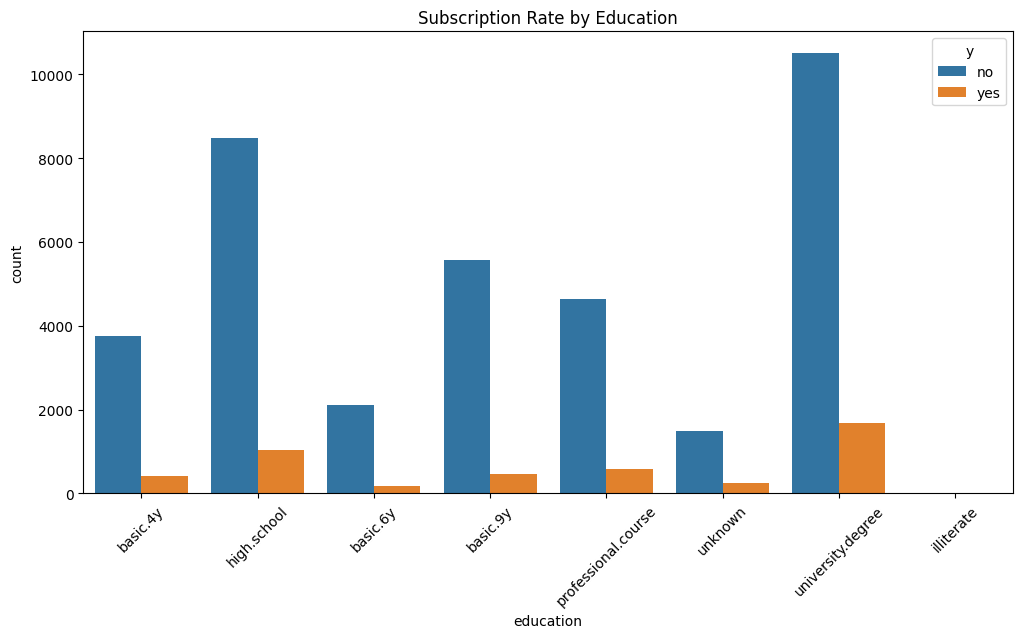

In [23]:
#Subscription rate by education
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="y", data=bank_graph)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Education")
plt.show()

From the visualization it is observed that people with a university degree were observed to have a higer count of people who decided not to subscribe and at the same time recorded the highest number of people who subscribed. The illiterate category had no people either subscribing or not subscribing.

It will make more business sense to target those who have a university degree and a high school certificate because they have a higher count of yes subscription.

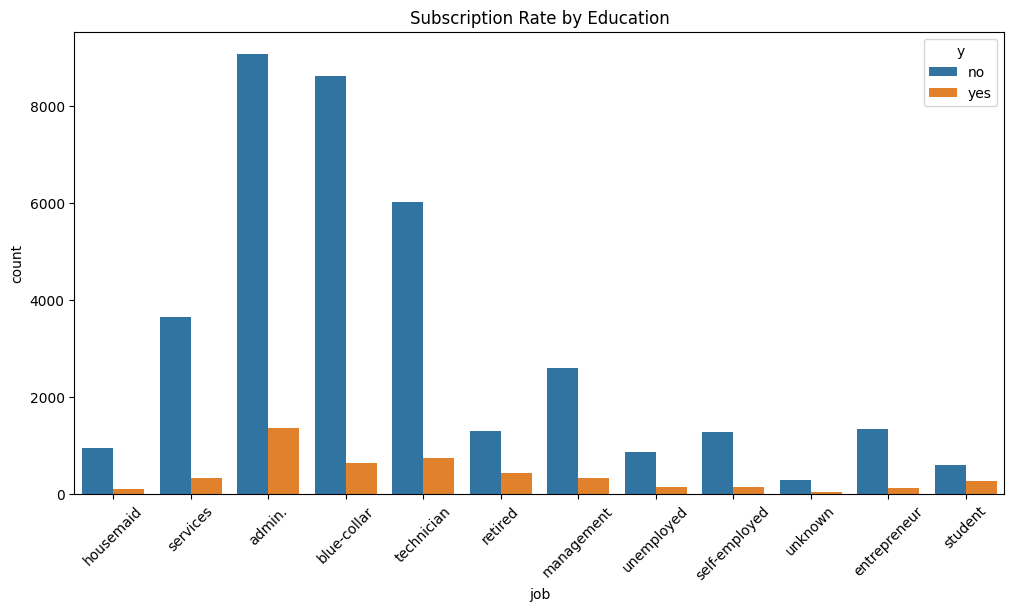

In [24]:
#Subscription rate by job
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="y", data=bank_graph)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Education")
plt.show()

From the visualization it can be deduced that those who work in administration roles have the highest count of people not subscribing to the service followed by those in blue-collar job. Also those in the administration role have the highest count of people subscribing to the service followed by the technicians.

It will make more business sense to target those in the administration, blue-collar and technician roles because they have a higher count of yes subscription.  

<Figure size 1200x600 with 0 Axes>

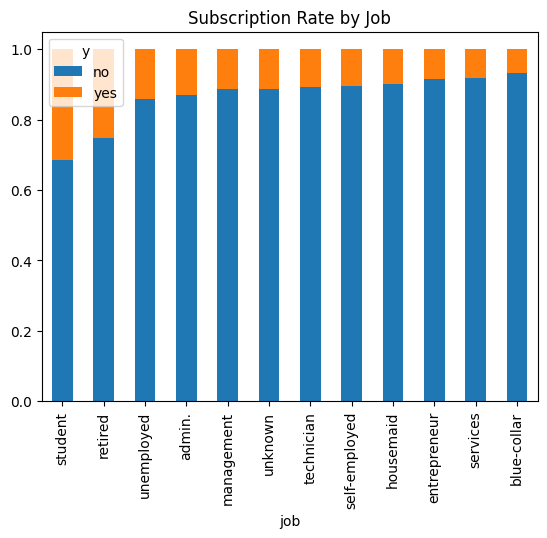

In [25]:
#Subscription rate by job
plt.figure(figsize=(12, 6))
job_y = bank_graph.groupby('job')['y'].value_counts(normalize=True).unstack().sort_values('yes', ascending=False)
job_y.plot(kind='bar', stacked=True)
plt.title("Subscription Rate by Job")
plt.show()

From the stacked bar chart the student job category has a higher count of people subscribing and those in the blue-collar job have a lower count of those subscribing.

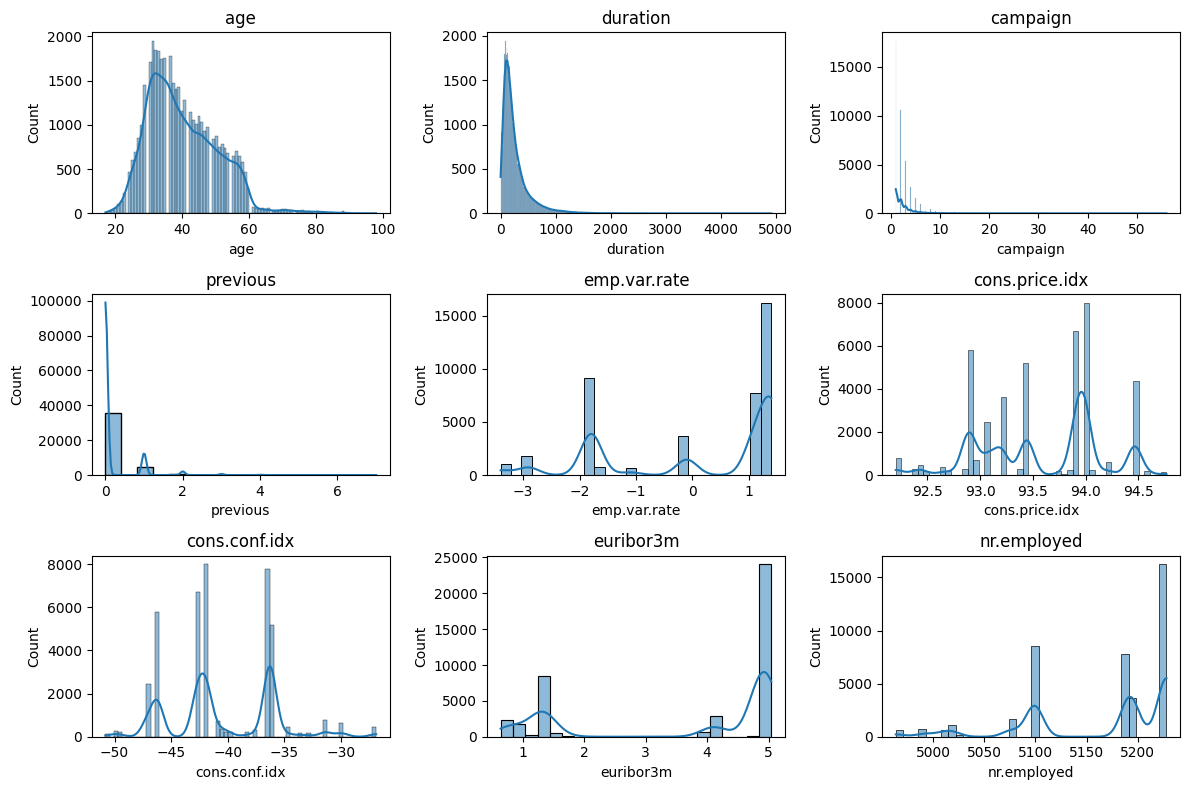

In [26]:
# Select numeric columns
numeric_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bank_graph[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

I performed log scaling of duration before plotting again because it appears skewed to the right.

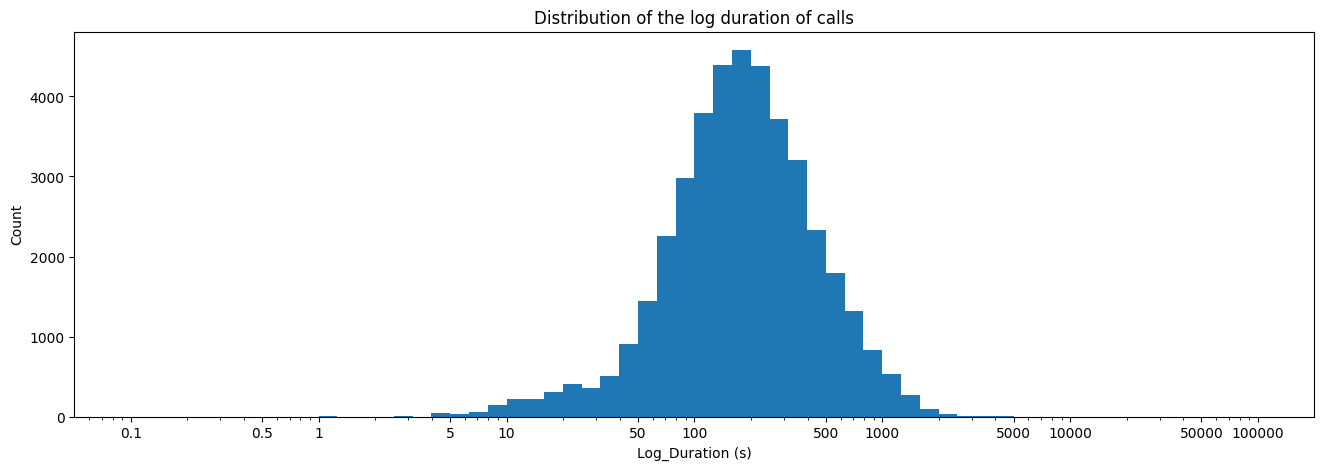

In [27]:
plt.figure(figsize=[16,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000,5000,10000,50000,100000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=bank_graph, x='duration', bins=bins);
plt.title('Distribution of the log duration of calls')
plt.xlabel('Log_Duration (s)')
plt.ylabel('Count')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

Distribution of the job type vs education

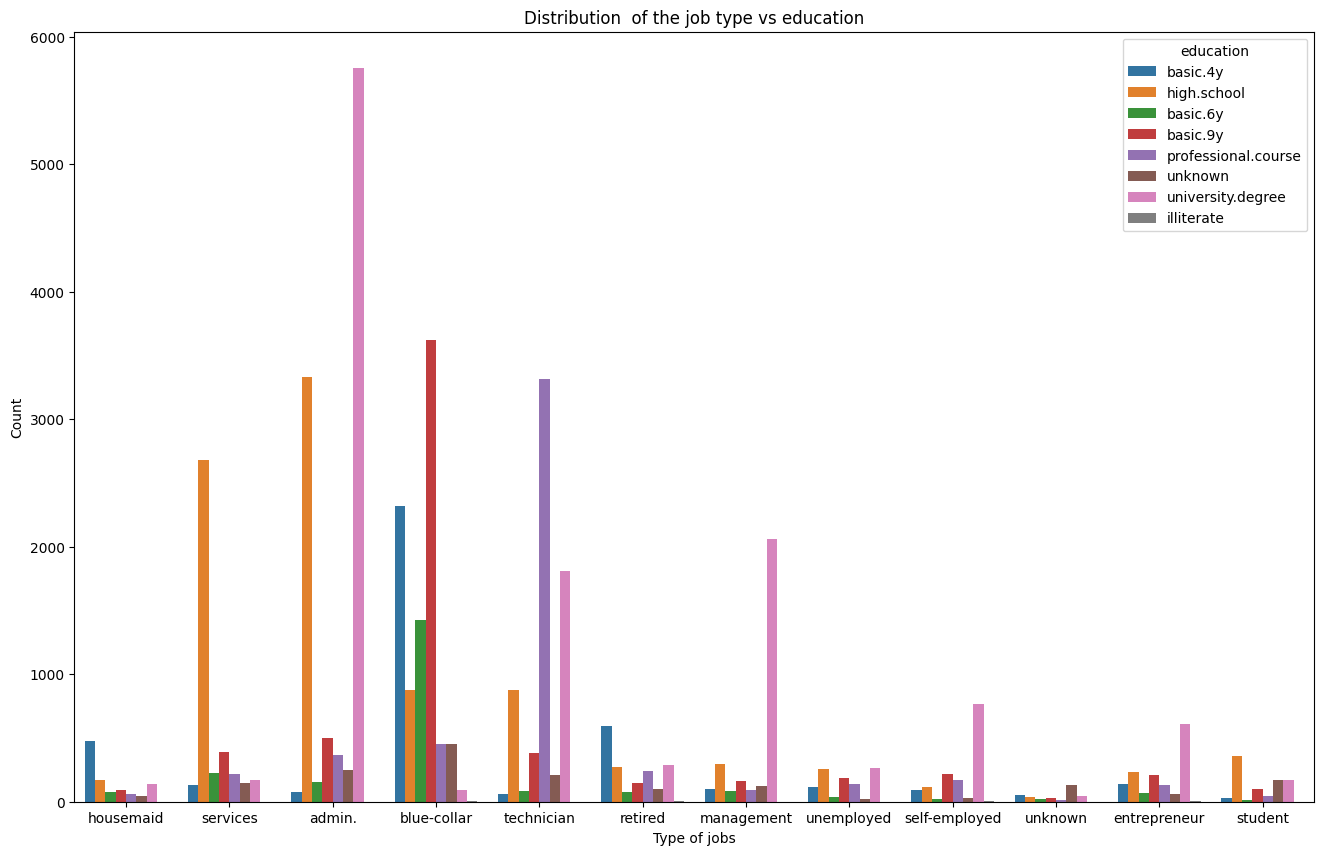

In [28]:
plt.figure(figsize = [16, 10])
sns.countplot(data = bank_graph, x = 'job', hue = 'education');
plt.title('Distribution  of the job type vs education')
plt.xlabel('Type of jobs')
plt.ylabel('Count');

From the visualization above it can be seen that most of the people counted are people working in the various job categories are people with a university degree or a high school certificate. The technicians are the job category with the highest count of people having a professional course certificate.

<ipython-input-29-3148958878>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
<ipython-input-29-3148958878>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')


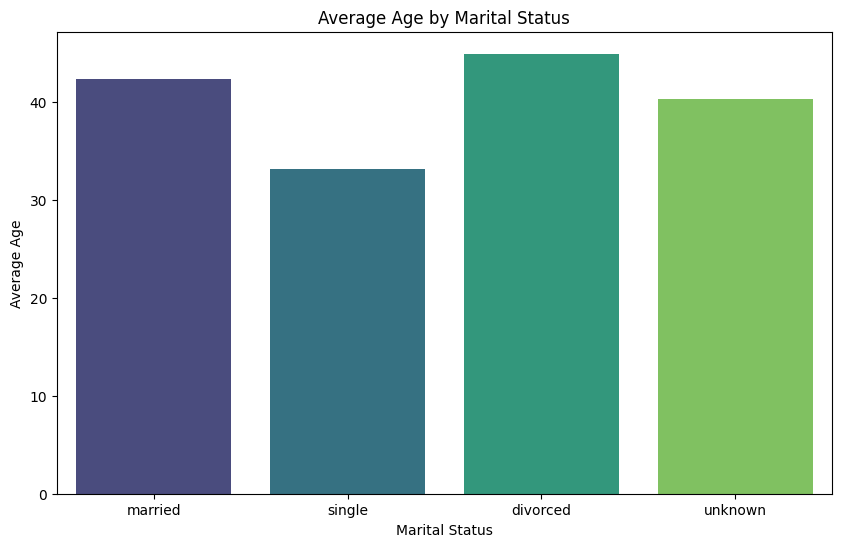

In [29]:
# Bar Plot (Average Age per Marital Status)
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
plt.title('Average Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Age')
plt.show()

From the graph those that have their marital status to be divorced have the highest average age followed by those who are married. The single category has the lowest averge age when compared to the other categories.

<ipython-input-30-4111192870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital', y='age', data=bank_graph, palette='Set2')


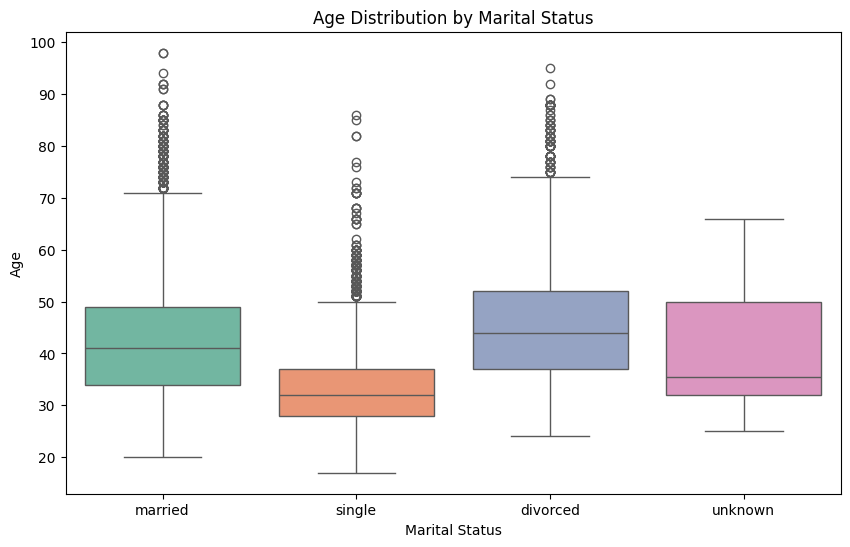

In [30]:
# Box Plot (Age Distribution per Marital Status)
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=bank_graph, palette='Set2')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

<ipython-input-31-553010414>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
<ipython-input-31-553010414>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')


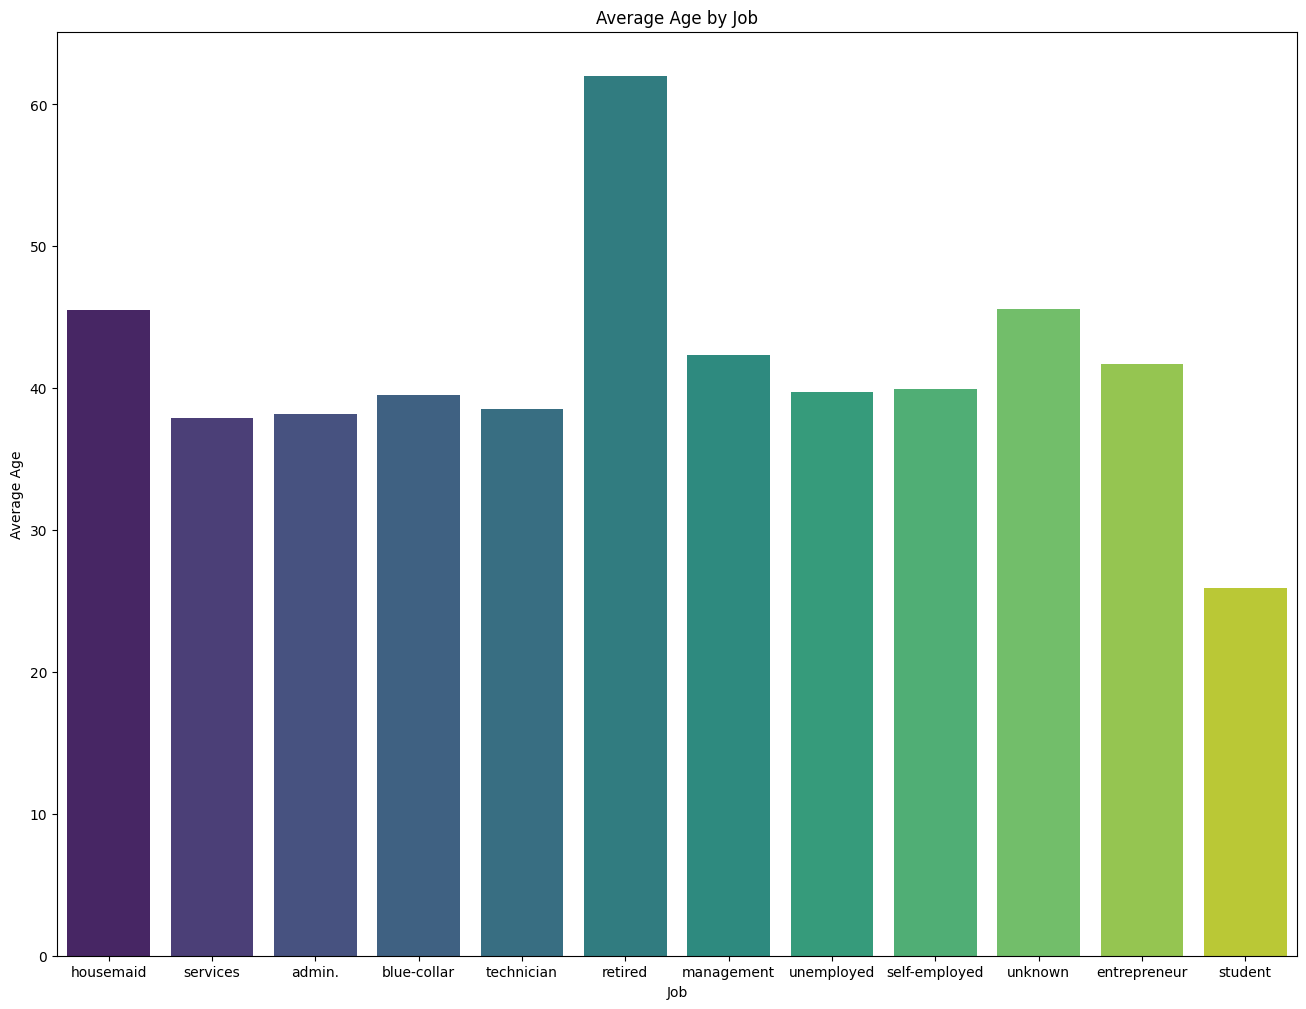

In [31]:
# Bar Plot (Average Age per Job)
plt.figure(figsize=(16, 12))
sns.barplot(x='job', y='age', data=bank_graph, estimator='mean', ci=None, palette='viridis')
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.show()

From the graph those that have their job status to be retired have the highest average age followed by those who are house maids. The students have the lowest average age when compared.

Check class imbalance of y

In [32]:
print("\nTarget distribution (y):\n", bank_additional_full_clean["y"].value_counts(normalize=True))


Target distribution (y):
 y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


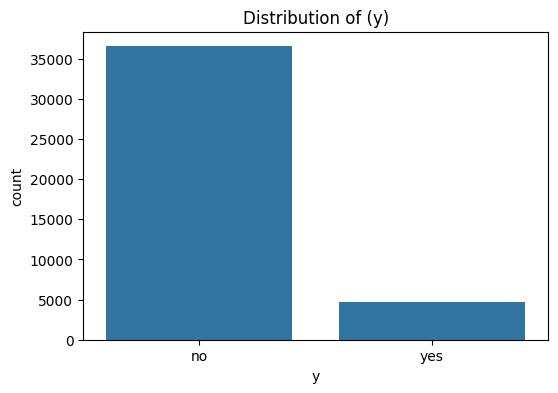


Class Distribution:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [33]:
# Check class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_graph)
plt.title("Distribution of (y)")
plt.show()

# Percentage of 'yes' (1) vs 'no' (0)
print("\nClass Distribution:")
print(bank_graph['y'].value_counts(normalize=True) * 100)

The target variable y is imbalanced (11.26% for "yes" and 88.73% for "no"),

In [34]:
# Binary encoding for target (y)
bank_additional_full_clean['y'] = bank_additional_full_clean['y'].map({'no':0, 'yes':1})

In [35]:
# One-hot encode nominal variables
nominal_features = ['job', 'marital', 'contact', 'poutcome']
bank_additional_full_clean = pd.get_dummies(bank_additional_full_clean, columns=nominal_features, drop_first=True)

In [36]:
# Ordinal encode education
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                  'high.school', 'professional.course', 'university.degree']
bank_additional_full_clean['education'] = bank_additional_full_clean['education'].map({v:k for k,v in enumerate(education_order)})


In [37]:
# Create month mapping dictionary
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
# Cyclical encode month
bank_additional_full_clean['month_sin'] = np.sin(2 * np.pi * bank_additional_full_clean['month'].map(month_to_num)/12)
bank_additional_full_clean['month_cos'] = np.cos(2 * np.pi * bank_additional_full_clean['month'].map(month_to_num)/12)

In [38]:
bank_additional_full_clean.head(5)

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos
0,56,1.0,no,no,may,mon,261,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
1,57,4.0,no,no,may,mon,149,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
2,37,4.0,yes,no,may,mon,226,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
3,40,2.0,no,no,may,mon,151,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
4,56,4.0,no,yes,may,mon,307,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025


In [39]:
day_to_num = {
    'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4, 'sat':5, 'sun':6
}

# Cyclical encode day
bank_additional_full_clean['day_sin'] = np.sin(2 * np.pi * bank_additional_full_clean['day_of_week'].map(day_to_num)/7)
bank_additional_full_clean['day_cos'] = np.cos(2 * np.pi * bank_additional_full_clean['day_of_week'].map(day_to_num)/7)

In [40]:
# Drop original month and day of the week columns
bank_additional_full_clean = bank_additional_full_clean.drop(['month', 'day_of_week'], axis=1)

In [41]:
#  Handle remaining binary features
binary_cols = ['housing', 'loan']
for col in binary_cols:
    bank_additional_full_clean[col] = bank_additional_full_clean[col].replace({'no':0, 'yes':1, 'unknown':2})

<ipython-input-41-1495913434>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_additional_full_clean[col] = bank_additional_full_clean[col].replace({'no':0, 'yes':1, 'unknown':2})


In [42]:
# Final Check
bank_additional_full_clean.head(5)

,age,education,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,marital_married,marital_single,marital_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,56,1.0,0,0,261,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
1,57,4.0,0,0,149,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
2,37,4.0,1,0,226,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
3,40,2.0,0,0,151,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
4,56,4.0,0,1,307,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0


In [43]:
bank_additional_full_clean.housing.value_counts()

,count
housing,
1,21576
0,18622
2,990


In [44]:
bank_additional_full_clean.dtypes

,0
age,int64
education,float64
housing,int64
loan,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64


In [45]:
print("\nData shape after:", bank_additional_full_clean.shape)


Data shape after: (41188, 35)


Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = bank_additional_full_clean.drop('y', axis=1)
y = bank_additional_full_clean['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Handle Class Imbalance

SMOTE

In [47]:
# Check which columns have missing values
print(X_train.isnull().sum())

# Or check total missing values
print(X_train.isnull().sum().sum())

age                        0
education               1397
housing                    0
loan                       0
duration                   0
campaign                   0
pdays                      0
previous                   0
emp.var.rate               0
cons.price.idx             0
cons.conf.idx              0
euribor3m                  0
nr.employed                0
job_blue-collar            0
job_entrepreneur           0
job_housemaid              0
job_management             0
job_retired                0
job_self-employed          0
job_services               0
job_student                0
job_technician             0
job_unemployed             0
job_unknown                0
marital_married            0
marital_single             0
marital_unknown            0
contact_telephone          0
poutcome_nonexistent       0
poutcome_success           0
month_sin                  0
month_cos                  0
day_sin                    0
day_cos                    0
dtype: int64
1

In [48]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align labels with remaining samples

In [49]:
print(X_train.isnull().sum().sum())

0


In [50]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Baseline Model Training

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (Linear baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Random Forest (Non-linear baseline)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  # No scaling needed

RandomForestClassifier()

Evaluation Metrics

In [52]:
from sklearn.metrics import classification_report, roc_auc_score

# For Random Forest
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.52      0.59       928

    accuracy                           0.92      8238
   macro avg       0.82      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238

ROC-AUC: 0.7439832067550356


Feature Importance Analysis


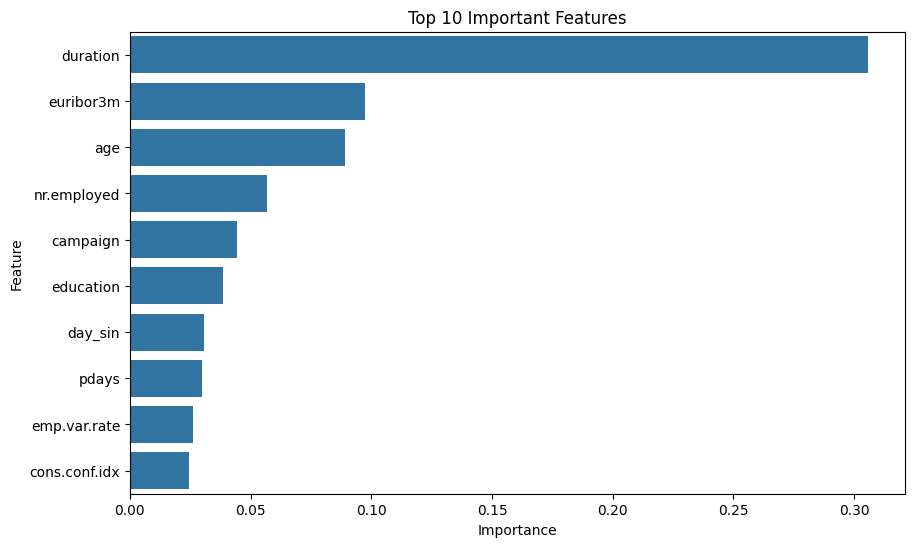

In [53]:
# For Random Forest
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

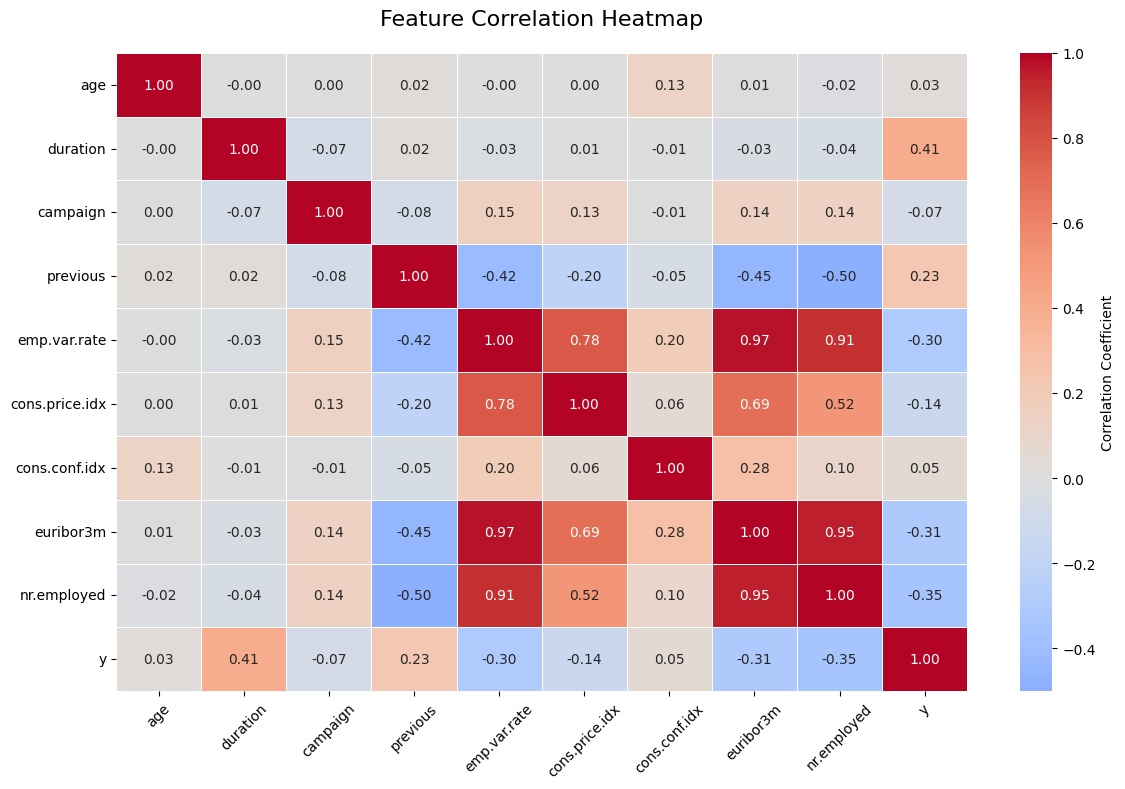

In [54]:
#Select numerical columns (exclude encoded categoricals for clarity)
numerical_cols = ['age', 'duration', 'campaign', 'previous',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed', 'y']
numerical_data = bank_additional_full_clean[numerical_cols]

# Calculate correlations
corr_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Feature Correlation Heatmap", pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the correlation heatmap the following can be observed:

1. Strong Positive Correlations

*   emp.var.rate and euribor3m (0.97)
*   emp.var.rate and nr.employed (0.91)
*  euribor3m and nr.employed (0.95)

The trio of emp.var.rate, euribor3m, and nr.employed show extremely high intercorrelation, suggesting they measure related economic conditions.

2. Strong Negative Correlations

*   previous and emp.var.rate (-0.42)
*  previous and nr.employed (-0.50)

3. Target Variable (y) Correlations

*   duration shows the strongest positive correlation with the target (0.41)
*   nr.employed has the strongest negative correlation (-0.35)
*   Most of the other features show weak correlations with the target variable










#Feature Engineering

Campaign Timing Features

In [55]:
# Days since last campaign contact (replace 999 with NaN first)
bank_additional_full_clean['days_since_last_contact'] = bank_additional_full_clean['pdays'].replace(999, np.nan)

# Call duration in minutes (instead of seconds)
bank_additional_full_clean['duration_min'] = bank_additional_full_clean['duration'] / 60

# Call duration bins (e.g., short/medium/long calls)
bank_additional_full_clean['duration_bin'] = pd.cut(bank_additional_full_clean['duration'],
                             bins=[0, 60, 300, float('inf')],
                             labels=['short', 'medium', 'long'])

In [56]:
bank_additional_full_clean.head(5)

,age,education,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos,days_since_last_contact,duration_min,duration_bin
0,56,1.0,0,0,261,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,4.350000,medium
1,57,4.0,0,0,149,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,2.483333,medium
2,37,4.0,1,0,226,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,3.766667,medium
3,40,2.0,0,0,151,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,2.516667,medium
4,56,4.0,0,1,307,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,5.116667,long


Interaction Features

Verify Available Columns

In [57]:
print(bank_additional_full_clean.columns.tolist())

['age', 'education', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'days_since_last_contact', 'duration_min', 'duration_bin']


Economic Pressure Index

This combines macroeconomic indicators to gauge financial stress

In [58]:
bank_additional_full_clean['economic_pressure'] = (
    bank_additional_full_clean['euribor3m'] *
    bank_additional_full_clean['cons.price.idx'] /
    (bank_additional_full_clean['cons.conf.idx'] + 1e-6)
)

 Employment-Adjusted Campaign Impact

 This accounts for labor market conditions when evaluating call campaigns

In [59]:
bank_additional_full_clean['employment_call_impact'] = (
    bank_additional_full_clean['campaign'] /
    (bank_additional_full_clean['nr.employed'] + 1e-6)
)

Previous Contact Efficiency

This measures the success rate of past contacts:

In [60]:
bank_additional_full_clean['previous_efficiency'] = (
    bank_additional_full_clean['previous'] /
    (bank_additional_full_clean['days_since_last_contact'] + 1e-6)
)

Age × Employment Variation

This will identify if age groups respond differently to economic changes:

In [61]:
bank_additional_full_clean['age_economic_sensitivity'] = (
    bank_additional_full_clean['age'] *
    bank_additional_full_clean['emp.var.rate']
)

Duration-to-Campaign Ratio

The purpose of this is to captures call quality vs quantity

In [62]:
bank_additional_full_clean['duration_per_contact'] = (
    bank_additional_full_clean['duration_min'] /
    (bank_additional_full_clean['campaign'] + 1e-6)
)


Consumer Confidence Impact

Optimize for the best-performing model:

In [64]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'max_depth': 20, 'n_estimators': 200}


Drop low-importance features after testing

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_additional_full_clean[['economic_pressure', 'employment_call_impact']])

Feature Importance Check after model training

In [66]:
importances = grid.best_estimator_.feature_importances_
feature_df = pd.DataFrame({
    'Feature':  X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_df.head(10))

             Feature  Importance
4           duration    0.310824
11         euribor3m    0.107467
0                age    0.082954
12       nr.employed    0.050414
5           campaign    0.040607
1          education    0.036612
6              pdays    0.033656
32           day_sin    0.029636
10     cons.conf.idx    0.027112
29  poutcome_success    0.026872


Save model for production:

In [67]:
import joblib

# Save the trained model
joblib.dump(rf, 'bank_predict_model.pkl')

# Later, load it back
trained_model = joblib.load('bank_predict_model.pkl')

#Make Predictions on New Data

In [68]:
new_bank_data = pd.read_csv("extracted/data/bank-additional.csv", delimiter=';')
new_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [69]:
# Verify features of the loadec csv
print("Columns in new data:", new_bank_data.columns.tolist())

Columns in new data: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [70]:
# Verify  if the RandomForestClassifier or LogisticRegression model was saved
print(type(trained_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


 Preprocess New Data to Match Training Format

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply one-hot encoding (same as during training)
new_data_encoded = pd.get_dummies(new_bank_data, columns=categorical_cols)

# Ensure all expected one-hot columns exist (even if empty in new data)
expected_features = trained_model.feature_names_in_
for feature in expected_features:
    if feature not in new_data_encoded.columns:
        new_data_encoded[feature] = 0

# Select and reorder columns to match training
X_new = new_data_encoded[expected_features]

In [73]:
# Ensure the month_to_num dictionary is defined or accessible here
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Cyclical encode month using the month_to_num mapping
new_bank_data['month_sin'] = np.sin(2 * np.pi * new_bank_data['month'].map(month_to_num) / 12)
new_bank_data['month_cos'] = np.cos(2 * np.pi * new_bank_data['month'].map(month_to_num) / 12)

 Make Predictions and Display Output

In [75]:
#Generate predictions
predictions = trained_model.predict(X_new)
probabilities = trained_model.predict_proba(X_new)[:, 1]

# Add the predictions as a new column to the DataFrame
new_bank_data['prediction'] = predictions

# Add the probabilities as a new column to the DataFrame
new_bank_data['prediction_probability'] = probabilities

# Print the first 10 predictions to verify
print("\n--- First 10 Predictions ---")
print(new_bank_data[['age', 'job', 'marital', 'prediction', 'prediction_probability']].head(10))


--- First 10 Predictions ---
   age           job   marital  prediction  prediction_probability
0   30   blue-collar   married           0                    0.33
1   39      services    single           0                    0.09
2   25      services   married           0                    0.17
3   38      services   married           0                    0.05
4   47        admin.   married           0                    0.03
5   32      services    single           0                    0.12
6   32        admin.    single           1                    0.52
7   41  entrepreneur   married           0                    0.02
8   31      services  divorced           0                    0.02
9   35   blue-collar   married           0                    0.08


In [76]:
# Save full results to CSV
new_bank_data.to_csv('bank_predictions_results.csv', index=False)
print("\nPredictions saved to 'bank_predictions_results.csv'")


Predictions saved to 'bank_predictions_results.csv'
